# MODS202 - Econometrics
## Final Project - Nov 2024
DE CARVALHO MACHADO PINHEIRO Rafaela  
SANGINETO JUCA Marina

#### ***Imports***

In [517]:
import pandas as pd
import numpy as np

In [518]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t, f
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.stats.diagnostic import breaks_cusumolsresid
import warnings
warnings.filterwarnings("ignore")

### Part 1 - Cross-section Data
Using the HPRICE2.RAW dataset.

In [519]:
df = pd.read_csv('HPRICE2.raw', delim_whitespace=True, header=None, names = ["price","crime","nox","rooms","dist","radial","proptax","stratio","lowstat","lprice", "lnox", "lproptax"]) 
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


#### **1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.**

The expected value of the error term being equals to zero $E(\epsilon | X)=0$ is the fundamental hypothesis under which the OLS estimators are unbiased. It comes from it's linearity and exogeneity assumptions, the Gauss-Markov theorem uses those to states that the ordinary least squares (OLS) estimator has the lowest sampling variance within the class of linear unbiased estimators.

#### **2. Show that under this assumption the OLS estimators are indeed unbiased.**


Given the OLS estimator as:

$\hat{\beta} = (X^{T}X)^{-1}X^{T}Y$

Subistitute Y for the linear regression model:

$Y=\beta * X + \epsilon$

We got:

$E[\hat{\beta}] = E[(X^{T}X)^{-1}X^{T}(\beta X + \epsilon)]$

$E[\hat{\epsilon}]=E[(X^{T}X)^{-1}X^{T}X\beta]+E[(X^{T}X)^{-1}X^{T}\epsilon]$

$(X^{T}X)^{-1}X^{T}X = I$ and $(X^{T}X)^{-1}X^{T}$ is some constant. Simplifying:

$E[\hat{\beta}]=E[\beta]+(X^{T}X)^{-1}X^{T}E[\epsilon]$

As $E[\epsilon]=0$ and $\beta$ is constant, we get that:

$E[\hat{\beta}]=\beta$

What defines it as an unbiased estimator.

#### **3. Explain the sample selection bias with an example from the course.**

Sample selection bias arises when the sample chosen for analysis does not represents the entire population by choosing non-random data, overstated or understated .One exemple from the course to ilustrate it is the one from World War II. 

Researchers analyzed the bullet holes on planes that returned from war zones in order to determine which areas of the plane's structure needed reinforcement. However, the sample group only included planes that were able to return safely, and did not include planes that had been shot down and destroyed. As a result, the sample was biased, as it did not account for the planes that were lost. The conclusion that reinforcing the areas with bullet holes was necessary was therefore incorrect, as the planes that returned were able to do so despite the damage, while the planes that were shot down likely had damage in different areas that were not observed. In reality, the researchers should have reinforced different areas of the plane's structure, since the sample was not representative of the full population of planes involved in the war effort. 

#### **4. Explain the omitted variable bias with an example from the course**

Omitted variable bias occurs when a significant explanatory variable is excluded from a model, and this variable is correlated with both the included explanatory variables and the dependent variable. This omission can result in biased estimates of the coefficients for the included variables. For instance, when estimating the effect of education on income, if we fail to include an individual's ability as an explanatory variable, we risk bias. Since ability is likely correlated with both education and income, its exclusion would distort the estimated impact of education on income.

One example from the course to ilustrate that is the estimation of the effect of education on income, if you fail to include ability as an explanatory variable, you will likely observe a biased estimate. This is because ability is likely correlated with both education and income, so excluding it from the model will cause the estimated effect of education on income to be biased.

#### **5. Explain the problem of multicollinearity. Is it a problem in this dataset?**

The problem of multicollinearity occurs when two or more explanatory variables in a regression model are highly correlated with each other. This can lead to unstable and imprecise estimates of the coefficients, as it becomes difficult to disentangle the individual effects of the correlated variables. Multicollinearity can also make it difficult to determine the statistical significance of the individual coefficients. An example from the course could be estimating the effect of both years of education and years of work experience on income, as these two variables are likely to be highly correlated.


In [520]:
det_df = np.linalg.det(df.T @ df)

print(f"Determinant of X'X is {det_df}")

if np.isclose(det_df, 0):
    print("There is multicollinearity in the data.")
else:
    print("There is no multicollinearity in the data.")

Determinant of X'X is 4.036293260430183e+42
There is no multicollinearity in the data.


From the results above, this dataset contains some highly correlated coefficients, such as radial the and the proptax with a correlation of 0.91. Therefore, we can state that the multicollinearity is a problem in this dataset

#### **6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%**

In [521]:
low, high = df['nox'].quantile([0.25, 0.75])
df['nox_level'] = pd.cut(df['nox'], bins=[df['nox'].min(), low, high, df['nox'].max()], labels=['low', 'medium', 'high'], include_lowest=True)
df.head()

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_level
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,medium
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,medium
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,medium
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,medium


#### **7. Compute for each category of nox level the average median price and comment on your results**

In [522]:
import pandas as pd
grouped = df.groupby('nox_level')
average_prices = grouped['price'].mean()

average_pricestable = pd.DataFrame({'NOx level': average_prices.index, 'Average Price': average_prices.values})
average_pricestable

,NOx level,Average Price
0,low,26977.093750
1,medium,22741.555118
2,high,17430.653226


These values suggest a descending trend in average median prices as the NOx level increases. This could indicate a negative correlation between NOx levels and housing prices.

#### **8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?**

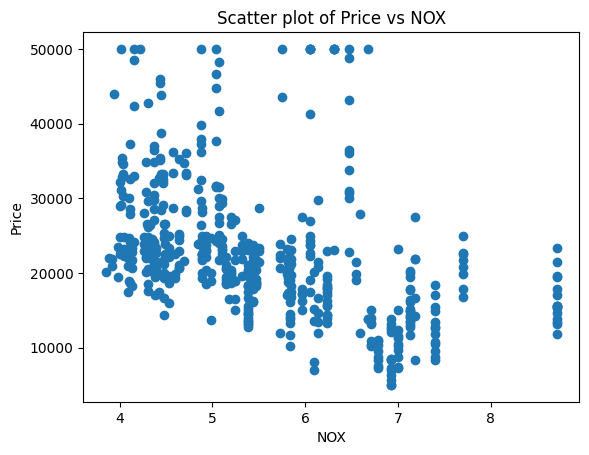

In [523]:
plt.scatter(df['nox'], df['price'])
plt.xlabel('NOX')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs NOX')
plt.show()

When analyzing the graph, it is possible to observe that the average prices increase as NOx levels rise. However, it cannot be asserted that this is a ceteris paribus effect because we do not know if the other variables are held constant, and a scatter plot alone is not sufficient. Moreover, it is possible to see that there are different prices for the same NOx level, indicating the likely presence of other variables influencing the price, which are therefore not constant.

#### **9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        22:18:07   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

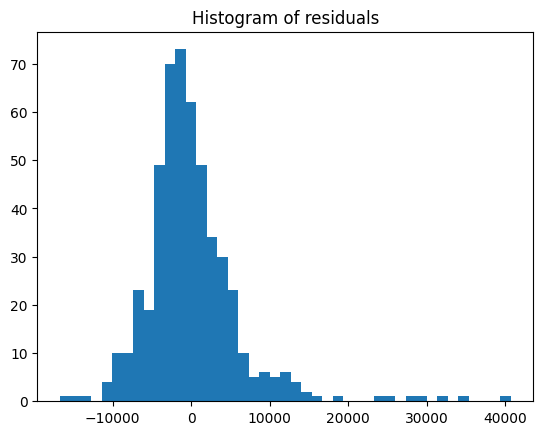

In [524]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y_9 = df['price']

X = sm.add_constant(X)

model = sm.OLS(y_9, X)
results9 = model.fit()
print(results9.summary())

plt.hist(results9.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, nox, rooms, proptax) are statistically significant to the price variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, nox, and proptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

#### **10. Run a regression of lprice on a *constant, crime, nox, rooms, proptax*. Interpret all coefficients.**


                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          2.50e-101
Time:                        22:18:07   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

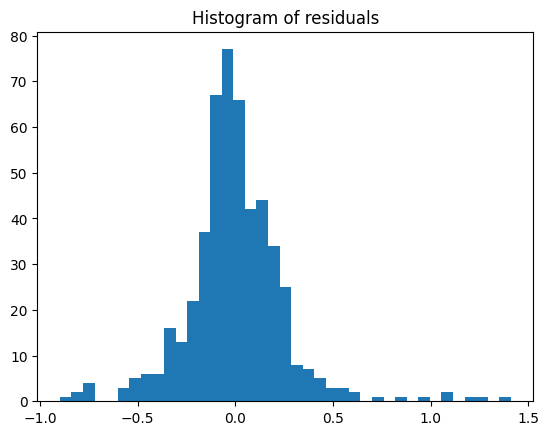

In [525]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y_10 = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y_10, X)
results10 = model.fit()
print(results10.summary())

plt.hist(results10.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()


The OLS regression results show that all the variables (crime, nox, rooms, proptax) are statistically significant to lprice variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, nox, and proptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

Comparing with the results of the previous model, the coefficients are smaller in this model. And the R-squared is higher in this model, which means that this model fits better than the previous one.

#### **11. Run a regression of lprice on a *constant, crime, lnox, rooms, lproptax*. Interpret all coefficients.**

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          1.77e-101
Time:                        22:18:07   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

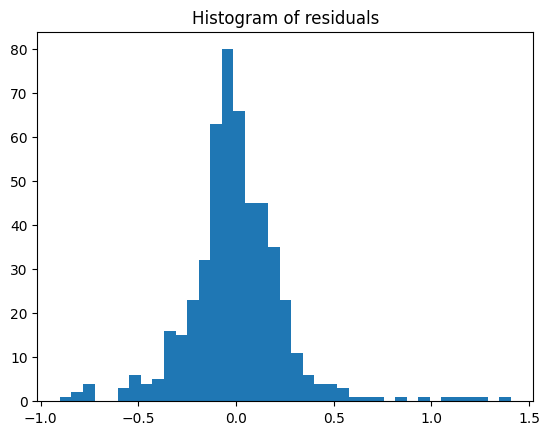

In [526]:
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results11 = model.fit()
print(results11.summary())

plt.hist(results11.resid, bins='auto')
plt.title('Histogram of residuals')
plt.show()

The OLS regression results show that all the variables (crime, lnox, rooms, lproptax) are statistically significant to lprice variation as their p-values are less than 0.05.

The coefficients indicate that the price is negatively correlated with crime, lnox, and lproptax, and positively correlated with rooms.

The histogram of residuals follows a normal distribution. It suggests that the linear regression model might fit for this data.

The R-squared is a little bit higher than the previous model, which means that this model fits better than the previous one.


#### **12. In the specification of question 9, test the hypothesis $H_{0}: β_{nox} = 0$ vs. $H_{1}: β_{nox} ≠ 0$ at the 1% level using the p-value of the test**

In [527]:
alpha = 0.01

t_statistic = results10.params['crime'] / results10.bse['crime']

k = len(results10.params) - 1
ndf = len(y_10) - k - 1

p_value = t.cdf(abs(t_statistic), df=ndf)


print('T-statistic:', t_statistic)
print('P-value:', p_value)

if p_value < alpha:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

T-statistic: -7.640950055881998
P-value: 0.9999999999999447
We do not reject the null hypothesis at the 1% level.


#### **13. In the specification of question 9, test the hypothesis $H_{0}: β_{crime} = β_{proptax}$ at the 10% level**

In [528]:
p_value = results10.pvalues['nox']
alpha = 0.01
print('p_value = ', p_value)

if p_value < alpha:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

p_value =  0.00041069590525885213
We reject the null hypothesis at the 1% level.


#### **14. In the specification of question 9, test the hypothesis $H_{0}: β_{nox} = 0, β_{proptax} = 0$ at the 10% level**

Model:

$$
\text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax}} + u
$$

$$
\theta = \beta_1 - \beta_4
$$

Hypotheses:

$$
H_0: \theta = 0
$$

$$
H_1: \theta \neq 0
$$

Expressing $\beta_1$ in terms of $\theta$ and $\beta_4$:

$$
\beta_1 = \theta + \beta_4
$$

Substituting $\beta_1$ back into the model:

$$
\text{{lprice}} = \beta_0 + (\theta + \beta_4) \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax}} + u
$$
$$
\text{{lprice}} = \beta_0 + \theta \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot (\text{{crime}} + \text{{proptax}}) + u
$$

Creating a new variable:

$$
\text{{crime\_tax}} = \text{{crime}} + \text{{proptax}}
$$

Perform OLS regression:

$$
\text{{model}}: \quad \text{{lprice}} = \beta_0 + \theta \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot (\text{{crime}} + \text{{proptax}}) + u
$$

Hypothesis test:

$$
H_0: b_j = a_j  \quad \Rightarrow \quad \theta = 0
$$

$$
t = \frac{{b_j - a_j}}{{\text{{se}}(b_j)}}
$$

$$
t = \frac{{\theta}}{{\text{{se}}(\theta)}}
$$


In [529]:
X = df[['crime', 'nox', 'rooms']].copy()
X['crime_tax'] = X['crime'] + df['proptax']
X = sm.add_constant(X)

y = df['lprice']

model = sm.OLS(y, X)
results14 = model.fit()

# Hypothesis test:
# t = theta / se(theta)
t_stat = results14.params['crime'] / results14.bse['crime']

alpha = 0.1
k = len(results14.params) - 1 
ndf = len(y) - k - 1 # number of degrees of freedom
p_value = 2 * t.sf(abs(t_stat), df=ndf)

print('p_value:', p_value)
print('t-stat:', t_stat)

if p_value < alpha:
  print("We reject the null hypothesis at the", alpha*100, "% level.")
else:
  print("We do not reject the null hypothesis at the", alpha*100, "% level.")

p_value: 0.0003202080646098217
t-stat: -3.62358083660925
We reject the null hypothesis at the 10.0 % level.


#### **15. In the specification of question 9, test the hypothesis $H0: βnox = -500, βproptax = -100$ at the 10% level using the p-value of the test**

In [530]:
x_unrestricted = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax']])
x_restricted = sm.add_constant(df[['crime', 'rooms']])

y = df['lprice']

model_unrestricted = sm.OLS(y, x_unrestricted)
model_restricted = sm.OLS(y, x_restricted)

results_unrestricted = model_unrestricted.fit()
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom
n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
p_value = 2 * f.sf(F_statistic, q, ddf)

print(f'F Statistic: {F_statistic}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

F Statistic: 33.348835962831714
p-value: 5.0587528451219665e-14
Reject the null hypothesis


#### **16. In the specification of question 9, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of *nox*.**

Unrestricted model:

$$
\text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax}} + u
$$

Restricted model:

$$
\text{{lprice}} - \beta_2 \cdot \text{{nox}} - \beta_4 \cdot \text{{proptax}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \beta_3 \cdot \text{{rooms}}
$$

Given values:

$$
\beta_2 = -500, \quad \beta_4 = -100
$$

Substituting the values into the restricted model:

$$
\text{{lprice}} + 500 \cdot \text{{nox}} + 100 \cdot \text{{proptax}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \beta_3 \cdot \text{{rooms}}
$$

This represents the restricted model with the specified values for $\beta_2$ and $\beta_4$.


In [531]:
x_unrestricted = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax']])
x_restricted = sm.add_constant(df[['crime', 'rooms']])

y_unrestricted = df['lprice']
y_restricted = df['lprice'] + 500 * df['nox'] + 100 * df['proptax']

model_unrestricted = sm.OLS(y_unrestricted, x_unrestricted)
model_restricted = sm.OLS(y_restricted, x_restricted)

results_unrestricted = model_unrestricted.fit()
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom
n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


p_value = 2 * f.sf(F_statistic, q, ddf)

alpha = 0.10  # 10% significance level

print(f'P-Value: {p_value}')
print(f'F-Statistic: {F_statistic}')

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-Value: 0.0
F-Statistic: 10798305112.262835
Reject the null hypothesis


#### **17. Repeat the test of question 16 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test $H_{0}$.**

$$
\text{{model}}: \text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax}} + u
$$

$$
\theta = \beta_2 + \beta_4
$$

Hypotheses:
- $H_0: \theta = -1000$
- $H_1: \theta \neq -1000$

Expressing $\beta_2$ in terms of $\theta$ and $\beta_4$:

$$
\beta_2 = \theta - \beta_4
$$

Substituting $\beta_2$ back into the model:

$$
\text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + (\theta - \beta_4) \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax}} + u
$$
$$
\text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \theta \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot 
(\text{{proptax}} - \text{{nox}}) + u
$$
Creating a new variable:

$$
\text{{proptax\_nox}} = \text{{proptax}} - \text{{nox}}
$$

Perform OLS regression:

$$
\text{{model}}: \quad \text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \theta \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax\_nox}} + u
$$

Hypothesis test:

$$
H_0: b_j = a_j  \quad \Rightarrow \quad \theta = -1000
$$

$$
t = \frac{{b_j - a_j}}{{\text{{se}}(b_j)}}
$$

$$
t = \frac{{\theta + 1000}}{{\text{{se}}(\theta)}}
$$


In [532]:
X = df[['crime', 'nox', 'rooms']].copy()
X['proptax_nox'] = df['proptax'] - df['nox']
X = sm.add_constant(X)

y = df['lprice']

model = sm.OLS(y, X)
results14 = model.fit()

beta_1 = results14.params['nox']
t_stat = (beta_1 + 1000) / results14.bse['nox']

alpha = 0.1
k = len(results14.params) - 1
ndf = len(y) - k - 1 # number of degrees of freedom. 

p_value = 2 * t.sf(abs(t_stat), df=ndf)

print('P-value:', p_value)
print('t-stat:', t_stat)

if p_value < alpha:
  print("We reject the null hypothesis at the", alpha*100, "% level.")
else:
  print("We do not reject the null hypothesis at the", alpha*100, "% level.")

P-value: 0.0
t-stat: 77853.88070132492
We reject the null hypothesis at the 10.0 % level.


### Part 2 - Heteroskedasticity

#### **18. Explain the problem of heteroskedasticity with an example of the course.**

18.In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.  
First step: estimate the coefficient for low levels of nox:

$$
\text{{model}}: \quad \text{{lprice}} = \beta_0 + \beta_1 \cdot \text{{crime}} + \beta_2 \cdot \text{{nox}} + \beta_3 \cdot \text{{rooms}} + \beta_4 \cdot \text{{proptax}} + u
$$

Now we know the coefficients, and we can make the hypothesis test for medium and high levels of nox:

- $H_0$: $b_{i_{\text{{low}}}} = b_{i_{\text{{high\_medium}}}} \quad \forall \; i$
- $H_1$: $b_{i_{\text{{low}}}} \neq b_{i_{\text{{high\_medium}}}} \quad \exists \; i$

$$
\text{{Restricted model}}: \quad \text{{lprice}} - \beta_1 \cdot \text{{crime}} - \beta_2 \cdot \text{{nox}} - \beta_3 \cdot \text{{rooms}} - \beta_4 \cdot \text{{proptax}} = \beta_0 + u
$$

where $\beta_n \forall\; n \in \{1,2,3,4\}$ are the coefficients estimated in the previous model.

In [533]:
# First step: estimate the coefficient for low levels of nox
x_unrestricted = df[df['nox_level'] == 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
x_unrestricted = sm.add_constant(x_unrestricted)

y_unrestricted = df[df['nox_level'] == 'low']['lprice']

model = sm.OLS(y_unrestricted, x_unrestricted)
results_unrestricted = model.fit()

# Restricted model:

x_medium_high = df[df['nox_level'] != 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
y_medium_high = df[df['nox_level'] != 'low']['lprice']

x_restricted = sm.add_constant(x_medium_high)[
    ['const']]  # Only the constant goes here
y_restricted = y_medium_high - results_unrestricted.params['crime'] * x_medium_high['crime'] \
    - results_unrestricted.params['nox'] * x_medium_high['nox']\
    - results_unrestricted.params['rooms'] * x_medium_high['rooms'] \
    - results_unrestricted.params['proptax'] * x_medium_high['proptax']

model_restricted = sm.OLS(y_restricted, x_restricted)
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
p_value = f.sf(F_statistic, q, ddf)

print(f'P-Value: {p_value}')
print(f'F-Statistic: {F_statistic}')

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-Value: 0.0
F-Statistic: 37988.17576772672
Reject the null hypothesis


#### **19. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of u2 on constant, crime, nox, rooms, proptax, test $H_{0}: \delta_{crime}, \delta_{nox}, \delta_{room}, \delta_{proptax} = 0$, where the coefficients $\delta_{k}$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.**

19.Repeat the test of question 18 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test $H_0$  
Now that we have the coefficients, we can conduct a hypothesis test for medium and high levels of NOx. The hypotheses are as follows:

- Null Hypothesis ($H_0$): $b_{i_{\text{low}}} = b_{i_{\text{high\_medium}}} \quad \forall \; i \in \{2,4\}$
- Alternative Hypothesis ($H_1$): $b_{i_{\text{low}}} \neq b_{i_{\text{high\_medium}}} \quad \text{for some } i \in \{2,4\}$

We have two models:

1. **Unrestricted model:**
   - $ \text{lprice} = \beta_0 + \beta_1 \cdot \text{crime} + \beta_2 \cdot \text{nox} + \beta_3 \cdot \text{rooms} + \beta_4 \cdot \text{proptax} + u $

2. **Restricted model:**
   - $ \text{lprice} - \beta_2 \cdot \text{nox} - \beta_4 \cdot \text{proptax} = \beta_0 + \beta_1 \cdot \text{crime} + \beta_3 \cdot \text{rooms} + u $
   - where $ \beta_2 $ and $ \beta_4 $ are the results of the unrestricted model

considering $\alpha = 0.1$:

In [534]:
# First step: estimate the coefficient for low levels of nox
x_unrestricted = df[df['nox_level'] == 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
x_unrestricted = sm.add_constant(x_unrestricted)

y_unrestricted = df[df['nox_level'] == 'low']['lprice']

model = sm.OLS(y_unrestricted, x_unrestricted)
results_unrestricted = model.fit()

# Second step: estimate the restricted model for medium and high levels of nox
x_medium_high = df[df['nox_level'] != 'low'][[
    'crime', 'nox', 'rooms', 'proptax']]
x_restricted = x_medium_high[['crime', 'rooms']]
x_restricted = sm.add_constant(x_restricted)

y_medium_high = df[df['nox_level'] != 'low']['lprice']
y_restricted = y_medium_high - results_unrestricted.params['nox'] * x_medium_high['nox']\
    - results_unrestricted.params['proptax'] * x_medium_high['proptax']

model_restricted = sm.OLS(y_restricted, x_restricted)
results_restricted = model_restricted.fit()

# Hypothesis test:
SSR_unrestricted = results_unrestricted.ssr
SSR_restricted = results_restricted.ssr

k_unrestricted = x_unrestricted.shape[1] - 1
k_restricted = x_restricted.shape[1] - 1

q = k_unrestricted - k_restricted  # numerator degrees of freedom

n = len(y)
ddf = n - k_unrestricted - 1  # denominator degrees of freedom

F_statistic = ((SSR_restricted - SSR_unrestricted) / q) / \
    (SSR_unrestricted / ddf)


alpha = 0.10  # 10% significance level
p_value = f.sf(F_statistic, q, ddf)

print(f'P-Value: {p_value}')
print(f'F-Statistic: {F_statistic}')

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

P-Value: 0.0
F-Statistic: 6926.010531682444
Reject the null hypothesis


#### **20. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form**

In [535]:
X = df[['crime', 'nox', 'rooms', 'proptax']]

X = sm.add_constant(X)

u = results10.resid
u2 = u**2
y = u2
model = sm.OLS(y, X)
results = model.fit()

f_statistic = results.fvalue

alpha = 0.1
k = len(results.params) - 1
n = len(y)
ddf = n - k - 1

p_value = f.sf(f_statistic, dfn=k, dfd=ddf)

print('P-value = ', p_value)
print('F-statistic = ', f_statistic)

if p_value < alpha:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

P-value =  8.329911128386772e-14
F-statistic =  17.97638257131338
We reject the null hypothesis at the 1% level.


#### **21. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form**

In [536]:
X = df[['crime', 'lnox', 'rooms', 'lproptax']]

X = sm.add_constant(X)

u = results11.resid
u2 = u**2
y = u2
model = sm.OLS(y, X)
results = model.fit()

f_statistic = results.fvalue

alpha = 0.1
k = len(results.params) - 1
n = len(y)
ddf = n - k - 1

p_value = f.sf(f_statistic, dfn=k, dfd=ddf)

print('P-value:', p_value)
print('F-statistic = ', f_statistic)

if p_value < alpha:
    print("We reject the null hypothesis at the 1% level.")
else:
    print("We do not reject the null hypothesis at the 1% level.")

P-value: 1.0205916389181349e-12
F-statistic =  16.509872938658404
We reject the null hypothesis at the 1% level.


#### **22. Comment on the differences between your results of questions 20, 21, 22.**

In all three tests, the null hypothesis is rejected, indicating the presence of heteroskedasticity. However, an increase in the F-statistic is noticeable when comparing the tests. In the first test, the F-value is 6.799; in the second, F is 19.98; and in the third, F is 18.27. The increment in the F-value is noteworthy because as it increases, it moves further away from the critical value, which remains constant at 1.95 for all tests. Therefore, it can be concluded that as the F-value rises, we gain more certainty about the presence of heteroskedasticity.

In [537]:
x_22 = df[['crime', 'nox', 'rooms', 'proptax']]
x_22 = sm.add_constant(x_22)

u = results9.resid
u2 = u**2
y_22 = u2
model = sm.OLS(y_22, x_22)
results22 = model.fit()

f_statistic = results22.fvalue

alpha = 0.1
k = len(results22.params) - 1
n = len(y_22)
ddf = n - k - 1

p_value = f.sf(f_statistic, dfn=k, dfd=ddf)

print('P-value = ', p_value)
print('F-statistic = ', f_statistic)

if p_value < alpha:
    print("We reject the null hypothesis at the 1%% level.")
else:
    print("We do not reject the null hypothesis at the 1%% level.")

P-value =  2.467207343890163e-05
F-statistic =  6.798893253091278
We reject the null hypothesis at the 1%% level.


#### **23. Using the specification of question 9, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight. Compare the standards errors with those of question 9. Comment on your results.**

### Part 3 - Time Series Data
Using the threecenturies_v2.3 datasets.

In [538]:
centuriesDf = pd.read_excel('threecenturies.xlsx', sheet_name='A1. Headline series', header=3)
centuriesDf = centuriesDf.drop(centuriesDf.index[:3]).reset_index(drop=True)
centuriesDf = centuriesDf[['Description', 'Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']]
centuriesDf.columns = ['Year', 'Real GDP', 'Unemployment Rate', 'Inflation']
centuriesDf = centuriesDf[(centuriesDf['Year'] >= 1900) & (centuriesDf['Year'] <= 2000)].reset_index(drop=True)
centuriesDf

,Year,Real GDP,Unemployment Rate,Inflation
0,1900,181160.264436,3.679865,4.058273
1,1901,184974.529384,4.877351,-0.3
2,1902,187756.550527,5.145694,0
3,1903,186015.76815,5.603507,1.10331
4,1904,188155.559259,6.914821,-0.396825
...,...,...,...,...
96,1996,1243709,8.097052,2.400308
97,1997,1282602,6.972014,1.824606
98,1998,1323527,6.255467,1.557398
99,1999,1366983,5.976813,1.32871


#### **24. Define strict and weak stationarity.**

#### **25. Explain ergodicity and state the ergodic theorem. Illustrate with an example.**

#### **26. Why do we need both stationarity and ergodicity?**

#### **27. Explain “spurious regression”.**

#### **28. Make all time series stationary by computing the difference between the original variable and a moving average of order 2x10. Give the formula for the exact weights.**

In [539]:
# Compute moving averages with a window size of 20
window_size = 20
centuriesDf_copy = centuriesDf.copy()
centuriesDf_copy['Real GDP Stationary'] = (centuriesDf_copy['Real GDP'].astype(float) - centuriesDf_copy['Real GDP'].astype(float).rolling(window=window_size, center=True).mean())
centuriesDf_copy['Unemployment Rate Stationary'] = (centuriesDf_copy['Unemployment Rate'].astype(float) - centuriesDf['Unemployment Rate'].astype(float).rolling(window=window_size, center=True).mean())
centuriesDf_copy['Inflation Stationary'] = (centuriesDf_copy['Inflation'].astype(float) - centuriesDf_copy['Inflation'].astype(float).rolling(window=window_size, center=True).mean())

# Drop rows with NaN values (resulting from rolling averages)
stationary_data = centuriesDf_copy[['Year', 'Real GDP Stationary', 'Unemployment Rate Stationary', 'Inflation Stationary']].dropna()
stationary_data


,Year,Real GDP Stationary,Unemployment Rate Stationary,Inflation Stationary
10,1910,-5157.680634,1.612217,-3.086901
11,1911,-18.483568,0.651997,-5.490429
12,1912,2719.669370,-0.436035,-2.536247
13,1913,10797.984003,-1.008674,-4.018009
14,1914,14098.371607,-1.592062,-1.757828
...,...,...,...,...
87,1987,22757.350000,1.520039,-3.135754
88,1988,57504.700000,-0.407737,-1.925612
89,1989,60572.900000,-1.798289,-0.151469
90,1990,42989.400000,-1.951712,2.085806


In [540]:
centuriesDf_copy['Real GDP MA'] = centuriesDf_copy['Real GDP'] - centuriesDf_copy['Real GDP'].rolling(window=21).mean()
centuriesDf_copy['Unemployment Rate MA'] = centuriesDf_copy['Unemployment Rate'] - centuriesDf_copy['Unemployment Rate'].rolling(window=21).mean()
centuriesDf_copy['Inflation MA'] = centuriesDf_copy['Inflation'] - centuriesDf_copy['Inflation'].rolling(window=21).mean()
centuriesDf_copy

,Year,Real GDP,Unemployment Rate,Inflation,Real GDP Stationary,Unemployment Rate Stationary,Inflation Stationary,Real GDP MA,Unemployment Rate MA,Inflation MA
0,1900,181160.264436,3.679865,4.058273,NaN,NaN,NaN,NaN,NaN,NaN
1,1901,184974.529384,4.877351,-0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,1902,187756.550527,5.145694,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1903,186015.76815,5.603507,1.10331,NaN,NaN,NaN,NaN,NaN,NaN
4,1904,188155.559259,6.914821,-0.396825,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
96,1996,1243709,8.097052,2.400308,NaN,NaN,NaN,253012.571429,-0.648767,-4.384041
97,1997,1282602,6.972014,1.824606,NaN,NaN,NaN,267631.761905,-1.848808,-4.301043
98,1998,1323527,6.255467,1.557398,NaN,NaN,NaN,283240.666667,-2.596862,-3.930865
99,1999,1366983,5.976813,1.32871,NaN,NaN,NaN,300893.238095,-2.897972,-3.867004


#### **29. Using the original dataset, test the unit root hypothesis for all variables**

In [541]:
# ADF test 
results = []
def adf_test(series, variable_name):
    result = adfuller(series, maxlag=0, regression='c', autolag=None)
    results.append({
        'Variable': variable_name, 
        'ADF Statistic': result[0], 
        'p-value': result[1], 
        'Reject Null Hypothesis': result[1] <= 0.05,
        '# of Observations': result[3]})

# def adf_test(series, variable_name, results=None):
#     result = adfuller(series, autolag='AIC')

#     # Initialize results list if not provided
#     if results is None:
#         results = []

#     # Append the results to the list
#     results.append({
#         'Variable': variable_name, 
#         'ADF Statistic': result[0], 
#         'p-value': result[1], 
#         'Reject Null Hypothesis': result[1] <= 0.05,
#         '# of Observations': result[3]
#     })

#     # Print the result
#     # print(f"Results of ADF Test for {variable_name}:")
#     # print(f"ADF Statistic: {result[0]:.4f}")
#     # print(f"p-value: {result[1]:.4f}")
#     # print(f"Critical Values: {result[4]}")
#     # print(f"Reject Null Hypothesis: {'Yes' if result[1] <= 0.05 else 'No'}\n")

#     return results


In [542]:
# running the ADF test
adf_test(centuriesDf['Real GDP'].dropna(), 'Real GDP')
adf_test(centuriesDf['Unemployment Rate'].dropna(), 'Unemployment Rate')
adf_test(centuriesDf['Inflation'].dropna(), 'Inflation')
results_table = pd.DataFrame(results)
results_table

# List to store all results
# adf_results = []

# # Perform ADF tests on differenced variables
# adf_results = adf_test(centuriesDf['Real GDP'], 'Real GDP', adf_results)
# adf_results = adf_test(centuriesDf['Unemployment Rate'], 'Unemployment Rate', adf_results)
# adf_results = adf_test(centuriesDf['Inflation'], 'Inflation', adf_results)

# # Convert the results to a DataFrame for easy analysis
# adf_results_df = pd.DataFrame(adf_results)
# adf_results_df

,Variable,ADF Statistic,p-value,Reject Null Hypothesis,# of Observations
0,Real GDP,7.040543,1.000000,False,100
1,Unemployment Rate,-2.044839,0.267265,False,100
2,Inflation,-3.669447,0.004564,True,100


#### **30. Transform all variables so that they are stationary using either your answers to questions 28 or to question 29.**

In [543]:
results_list = []
stationary_df = centuriesDf.copy().diff().dropna()
for column in stationary_df.columns[1:]:
    variable = column
    adf_result = adfuller(stationary_df[column], maxlag=0, regression='c', autolag=None)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    reject_null_hypothesis = p_value < 0.01
    results_list.append({
        'Variable': variable,
        'ADF Statistic': adf_statistic,
        'p-value': p_value,
        'Reject Null Hypothesis': reject_null_hypothesis})
results_table = pd.DataFrame(results_list)
results_table

,Variable,ADF Statistic,p-value,Reject Null Hypothesis
0,Real GDP,-4.612330,1.225763e-04,True
1,Unemployment Rate,-8.563655,8.561100e-14,True
2,Inflation,-9.690380,1.140695e-16,True


#### **31. Explain the difference between ACF and PACF.**

ACF (Autocorrelation Function): The ACF measures the correlation between a time series and its own lagged values. It quantifies how the current value of the series is related to its past values at various lags. The ACF is calculated for all possible lags and provides a complete picture of the correlation structure of the time series.  
PACF (Partial Autocorrelation Function): The PACF measures the correlation between a time series and its lagged values, but it does so while controlling for the effects of intermediate lags. In other words, the PACF at lag $k$ represents the correlation between the series and its $k$-th lag after removing the influence of all shorter lags (1 through $k−1$).

#### **32. Plot and comment on the ACF and PACF of all variables.**

In [ ]:
centuriesDf_diff = centuriesDf.copy()
centuriesDf_diff['Real GDP'] = centuriesDf['Real GDP'].diff().dropna()
centuriesDf_diff['Unemployment Rate'] = centuriesDf['Unemployment Rate'].diff().dropna()
centuriesDf_diff['Inflation'] = centuriesDf['Inflation'].diff().dropna()
centuriesDf_diff.dropna(inplace=True)
centuriesDf_diff

,Year,Real GDP,Unemployment Rate,Inflation
1,1901,3814.264947,1.197486,-4.358273
2,1902,2782.021143,0.268343,0.3
3,1903,-1740.782376,0.457813,1.10331
4,1904,2139.791108,1.311314,-1.500135
5,1905,5510.175237,-0.431623,0.795232
...,...,...,...,...
96,1996,30911,-0.524736,-0.256144
97,1997,38893,-1.125038,-0.575702
98,1998,40925,-0.716547,-0.267209
99,1999,43456,-0.278654,-0.228687


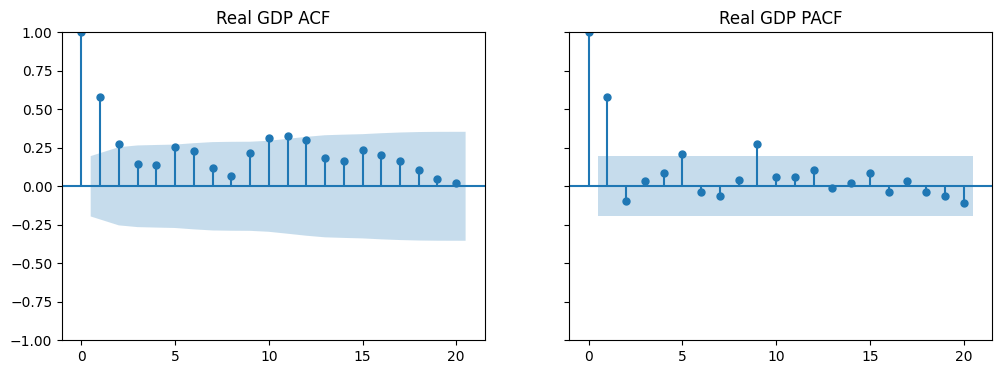

In [545]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
plot_acf(centuriesDf_diff['Real GDP'], ax=ax1, title='Real GDP ACF')
plot_pacf(centuriesDf_diff['Real GDP'], ax=ax2, title='Real GDP PACF')
plt.show()

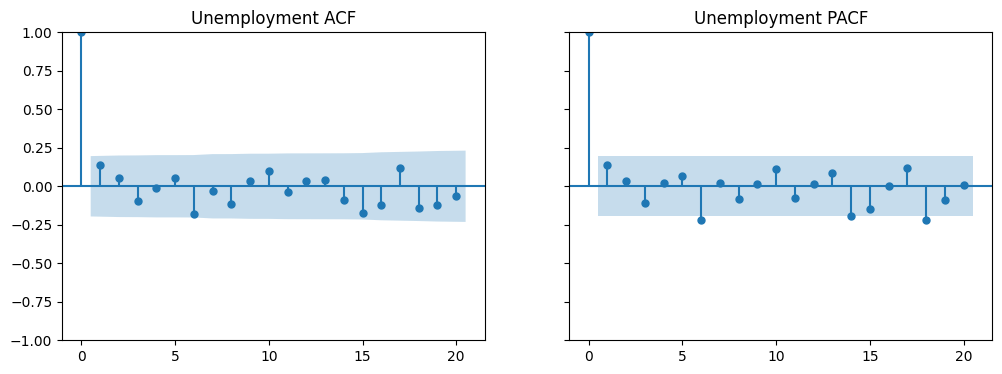

In [547]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
plot_acf(centuriesDf_diff['Unemployment Rate'], ax=ax1, title='Unemployment ACF')
plot_pacf(centuriesDf_diff['Unemployment Rate'], ax=ax2, title='Unemployment PACF')
plt.show()

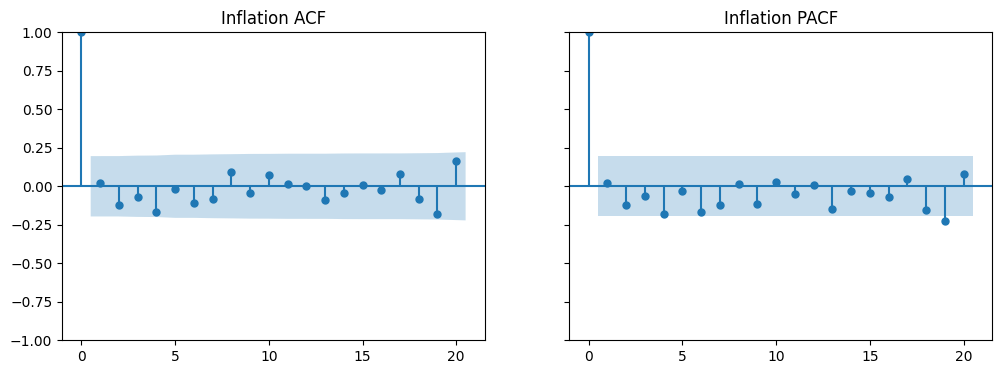

In [548]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
plot_acf(centuriesDf_diff['Inflation'], ax=ax1, title='Inflation ACF')
plot_pacf(centuriesDf_diff['Inflation'], ax=ax2, title='Inflation PACF')
plt.show()

#### **33. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.**

The principle of parsimony, often referred to as Ockham's razor, is a philosophical guideline that suggests when faced with multiple competing explanations or hypotheses, the one that makes the fewest assumptions should be selected. Essentially, among various hypotheses, the one that requires the least amount of assumptions is typically the most accurate.

**Ockham's Razor**  
Ockham's razor is a specific version of the principle of parsimony linked to the 14th-century English thinker William of Ockham. It emphasizes that one should not create more entities than necessary, meaning that unnecessary assumptions should be avoided. In practice, this often leads to a preference for simpler models over more complicated ones, especially when both can explain the data effectively.

**Information Criterion Theory**  

In the realm of statistical modeling and information theory, the principle of parsimony can be evaluated using specific criteria, like the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC). These criteria help assess and compare different statistical models based on how well they fit the data while also considering their complexity.

**Akaike Information Criterion** (AIC): The AIC is determined by the formula:  
$$AIC=2k−2ln(L)$$  
where $k$ represents the number of parameters in the model and $L$ is the likelihood of the model given the data. The AIC rewards models that fit the data well but also penalizes those that are overly complex.

**Bayesian Information Criterion** (BIC): The BIC is similar to the AIC but imposes a stronger penalty for the number of parameters:  
$$BIC=ln(n)k−2ln(L)$$  

where $n$ is the number of observations. The BIC tends to favor simpler models even more than the AIC, particularly as the sample size grows.

The connection between the principle of parsimony, Ockham's razor, and information criteria can be explained like this:

- Simplicity vs. Complexity: Both Ockham's razor and the principle of parsimony emphasize that simpler models or explanations are usually better. Information criteria like AIC and BIC put this idea into a mathematical context, helping to weigh the trade-off between how complex a model is and how well it fits the data.

- Model Selection: When researchers use AIC or BIC, they are essentially applying Ockham's razor in a numerical way. They compare different models and choose the one with the lowest AIC or BIC score, which indicates it is the simplest model that still effectively describes the data.

- Balancing Fit and Simplicity: Information criteria help to find a balance between how well a model fits the data and its complexity. This is at the heart of Ockham's razor: a model that fits the data too perfectly might be too complicated, making it less parsimonious and resulting in a higher AIC or BIC score.

In summary, the principles of parsimony and Ockham's razor steer the model selection process toward simpler options, while information criteria offer a solid method for numerically comparing models that embody these principles.

#### **34. Explain the problem of auto-correction of the errors.**

Auto-correlation of errors happens when the error terms in a regression model are linked to each other. This means that the errors from one time period rely on the errors from earlier periods, which goes against the idea that errors should be independent in regression analysis. When there is autocorrelation in the error terms, ordinary least squares (OLS) faces some problems. Even though the estimated regression coefficients are unbiased, they don't have the minimum variance property anymore. Moreover, the Mean Squared Error (MSE) can significantly underestimate the actual variance of the errors, and the standard error of the regression coefficients might greatly underestimate the real standard deviation. In these cases, the usual statistical intervals and inference methods may not be valid anymore.

#### **35. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors.**

#### **36. Regardless of your answer to question 35, correct auto-correlation with GLS. Test again for the presence of auto-correlation. Comment on your results.**

#### **37. For all variables, construct their lag 1 and lag 2 variables.**

#### **38. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why?**

#### **39. State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level.**

#### **40. Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.**

In [ ]:
def perform_chow_test(dataset, breakpoint_year, start=1900, end=2000):
    # Split the dataset into two subsets based on the breakpoint year
    subset1 = dataset[dataset['Year'].between(start, breakpoint_year)]
    subset2 = dataset[dataset['Year'].between(breakpoint_year + 1, end)].reset_index(drop=True)
    
    # Extract dependent and independent variables for both subsets
    dependent1 = subset1['Real GDP']
    dependent2 = subset2['Real GDP']
    independent1 = subset1[['Unemployment Rate', 'Inflation']].apply(pd.to_numeric, errors='coerce')
    independent2 = subset2[['Unemployment Rate', 'Inflation']].apply(pd.to_numeric, errors='coerce')
    dependent1 = pd.to_numeric(dependent1, errors='coerce')
    dependent2 = pd.to_numeric(dependent2, errors='coerce')
    
    # Fit regression models for each subset
    model_subset1 = sm.OLS(dependent1, sm.add_constant(independent1)).fit()
    model_subset2 = sm.OLS(dependent2, sm.add_constant(independent2)).fit()
    
    # Combine data for the overall model
    combined_independent = np.vstack((independent1, independent2))
    combined_dependent = np.concatenate((dependent1, dependent2))
    combined_model = sm.OLS(combined_dependent, sm.add_constant(combined_independent)).fit()
    
    # Calculate sum of squared residuals (SSR)
    total_ssr = combined_model.ssr
    ssr_subset1 = model_subset1.ssr
    ssr_subset2 = model_subset2.ssr
    
    # Compute the Chow test statistic
    num_params = combined_independent.shape[1] + 1
    total_obs = combined_model.nobs
    chow_stat = ((total_ssr - (ssr_subset1 + ssr_subset2)) / num_params) / ((ssr_subset1 + ssr_subset2) / (total_obs - 2 * num_params))
    
    # Calculate critical value and p-value
    significance_level = 0.01
    p_value = 1 - f.cdf(chow_stat, num_params, total_obs - 2 * num_params)
    critical_val = f.ppf(1 - significance_level, num_params, total_obs - 2 * num_params)
    
    # Return the results as a dictionary
    return {
        'Test Statistic': chow_stat,
        'Critical Value': critical_val,
        'p-value': p_value,
        'Significance Level': significance_level
    }

# Perform the Chow test
data_copy = centuriesDf.copy()
break_year = 1960
test_results = perform_chow_test(data_copy, break_year)

# Extract and print results
test_statistic = test_results['Test Statistic']
critical_val = test_results['Critical Value']
p_val = test_results['p-value']
alpha = test_results['Significance Level']

print("Chow Test Statistic:", test_statistic)
print("Critical Value:", critical_val)
print("p-value:", p_val)
print("Significance Level (alpha):", alpha)

# Interpret the results
if test_statistic > critical_val:
    print("Reject the null hypothesis: The regression coefficients differ between the two periods.")
else:
    print("Fail to reject the null hypothesis: The regression coefficients are consistent between the two periods.")


Chow Test Statistic: 166.091241202613
Critical Value: 3.994698310457514
p-value: 1.1102230246251565e-16
Significance Level (alpha): 0.01
Reject the null hypothesis: The regression coefficients differ between the two periods.


#### **41. Test the structural breakpoint using a trim ratio of 30% at the 1% level.**

In [ ]:
trim_ratio = 0.3
level = 0.01
t0 = int(len(centuriesDf) * trim_ratio)
t1 = len(centuriesDf) - t0
start_year = 1900 + t0
end_year = 2000 - t0
greater_chow_test_statistic = float('-inf')
breakpoint_year = 1900
for t in range(t0 + 1, t1 - 1):
    data = centuriesDf.copy()
    split_year = 1900 + t
    results = perform_chow_test(data, split_year, start=start_year, end=end_year)
    chow_test_statistic = results['Test Statistic']
    if chow_test_statistic > greater_chow_test_statistic:
        greater_chow_test_statistic = chow_test_statistic
        breakpoint_year = split_year
    
critical_value = f.ppf(1 - level, 3, 10000000)
p_value = 1 - f.cdf(greater_chow_test_statistic, 3, 10000000)
    
print('chow_test_statistic = ', greater_chow_test_statistic)
print('breakpoint_year = ', breakpoint_year)
print('critical_value = ', critical_value)
print('p value = ', p_value)

if greater_chow_test_statistic > critical_value:
    print("Reject the null hypothesis: there is at least one break in the regression function")
else:
    print("Fail to reject the null hypothesis: there is no evidence to claim that there is a break in the regression function")

chow_test_statistic =  86.14293774998397
breakpoint_year =  1958
critical_value =  3.7816241994522244
p value =  1.1102230246251565e-16
Reject the null hypothesis: there is at least one break in the regression function


#### **42. Divide the sample into 3 periods of equal length. Test that the coefficients of the second and the third periods are equal. Formulate the null hypothesis and interpret your results.**

In [ ]:
# delete the first and last entry
centCopy = centuriesDf.copy()
centCopy = centCopy.drop(0)
centCopy = centCopy.drop(len(centuriesDf) - 1)

centCopy1 = centCopy.iloc[:33]
centCopy2 = centCopy.iloc[33:66]
centCopy3 = centCopy.iloc[66:]

In [ ]:
# Define a function to perform the Chow test
def chow_test(data1, data2, independent_vars, dependent_var):
    # Ensure all columns are numeric and handle errors by coercing invalid entries to NaN
    data1[independent_vars] = data1[independent_vars].apply(pd.to_numeric, errors='coerce')
    data1[dependent_var] = pd.to_numeric(data1[dependent_var], errors='coerce')
    
    data2[independent_vars] = data2[independent_vars].apply(pd.to_numeric, errors='coerce')
    data2[dependent_var] = pd.to_numeric(data2[dependent_var], errors='coerce')

    # Drop any rows with missing values (NaN) after coercion
    data1 = data1.dropna(subset=independent_vars + [dependent_var])
    data2 = data2.dropna(subset=independent_vars + [dependent_var])

    # Prepare the data for period 1 and period 2
    X1 = sm.add_constant(data1[independent_vars])
    y1 = data1[dependent_var]
    
    X2 = sm.add_constant(data2[independent_vars])
    y2 = data2[dependent_var]
    
    # Fit the models for both periods
    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()
    
    # Fit the combined model for both periods
    X_combined = sm.add_constant(pd.concat([data1[independent_vars], data2[independent_vars]]))
    y_combined = pd.concat([y1, y2])
    model_combined = sm.OLS(y_combined, X_combined).fit()
    
    # Calculate SSR (sum of squared residuals) for the combined and individual models
    SSR_combined = model_combined.ssr
    SSR1 = model1.ssr
    SSR2 = model2.ssr
    
    # Number of observations and number of parameters
    n = len(X_combined)
    k = X_combined.shape[1]
    
    # Calculate the Chow test statistic
    chow_test_statistic = ((SSR_combined - (SSR1 + SSR2)) / k) / ((SSR1 + SSR2) / (n - 2 * k))
    
    # Degrees of freedom for the F-statistic
    df1 = k
    df2 = n - 2 * k
    
    # Calculate the critical value and p-value for the Chow test
    critical_value = f.ppf(1 - 0.01, df1, df2)  # 1% significance level
    p_value = 1 - f.cdf(chow_test_statistic, df1, df2)
    
    return chow_test_statistic, critical_value, p_value

# Divide the data into three periods
centCopy1 = centCopy.iloc[:33]
centCopy2 = centCopy.iloc[33:66]
centCopy3 = centCopy.iloc[66:]

# Set the variables
independent_vars = ['Unemployment Rate', 'Inflation']  # Independent variables
dependent_var = 'Real GDP'  # Dependent variable

# Perform Chow test between period 1 and period 2
chow_test_statistic_1_2, critical_value_1_2, p_value_1_2 = chow_test(centCopy1, centCopy2, independent_vars, dependent_var)
# Perform Chow test between period 2 and period 3
chow_test_statistic_2_3, critical_value_2_3, p_value_2_3 = chow_test(centCopy2, centCopy3, independent_vars, dependent_var)
# Perform Chow test between period 1 and period 3
chow_test_statistic_1_3, critical_value_1_3, p_value_1_3 = chow_test(centCopy1, centCopy3, independent_vars, dependent_var)

# Output the results for Period 1 vs Period 2
print("Chow Test (Period 1 vs Period 2) - Statistic:", chow_test_statistic_1_2)
print("Critical Value (Period 1 vs Period 2):", critical_value_1_2)
print("p-value (Period 1 vs Period 2):", p_value_1_2)
if chow_test_statistic_1_2 > critical_value_1_2:
    print("Reject the null hypothesis: coefficients are different between Period 1 and Period 2.")
else:
    print("Fail to reject the null hypothesis: coefficients are the same between Period 1 and Period 2.")

# Output the results for Period 2 vs Period 3
print("\nChow Test (Period 2 vs Period 3) - Statistic:", chow_test_statistic_2_3)
print("Critical Value (Period 2 vs Period 3):", critical_value_2_3)
print("p-value (Period 2 vs Period 3):", p_value_2_3)
if chow_test_statistic_2_3 > critical_value_2_3:
    print("Reject the null hypothesis: coefficients are different between Period 2 and Period 3.")
else:
    print("Fail to reject the null hypothesis: coefficients are the same between Period 2 and Period 3.")

# Output the results for Period 1 vs Period 3
print("\nChow Test (Period 1 vs Period 3) - Statistic:", chow_test_statistic_1_3)
print("Critical Value (Period 1 vs Period 3):", critical_value_1_3)
print("p-value (Period 1 vs Period 3):", p_value_1_3)
if chow_test_statistic_1_3 > critical_value_1_3:
    print("Reject the null hypothesis: coefficients are different between Period 1 and Period 3.")
else:
    print("Fail to reject the null hypothesis: coefficients are the same between Period 1 and Period 3.")


Chow Test (Period 1 vs Period 2) - Statistic: 35.57424039453741
Critical Value (Period 1 vs Period 2): 4.125891930795666
p-value (Period 1 vs Period 2): 2.4436008771999695e-13
Reject the null hypothesis: coefficients are different between Period 1 and Period 2.

Chow Test (Period 2 vs Period 3) - Statistic: 66.62865033100027
Critical Value (Period 2 vs Period 3): 4.125891930795666
p-value (Period 2 vs Period 3): 1.1102230246251565e-16
Reject the null hypothesis: coefficients are different between Period 2 and Period 3.

Chow Test (Period 1 vs Period 3) - Statistic: 170.2725006792456
Critical Value (Period 1 vs Period 3): 4.125891930795666
p-value (Period 1 vs Period 3): 1.1102230246251565e-16
Reject the null hypothesis: coefficients are different between Period 1 and Period 3.
